In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [5]:
tips_ds=sns.load_dataset('tips')
tips_ds

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


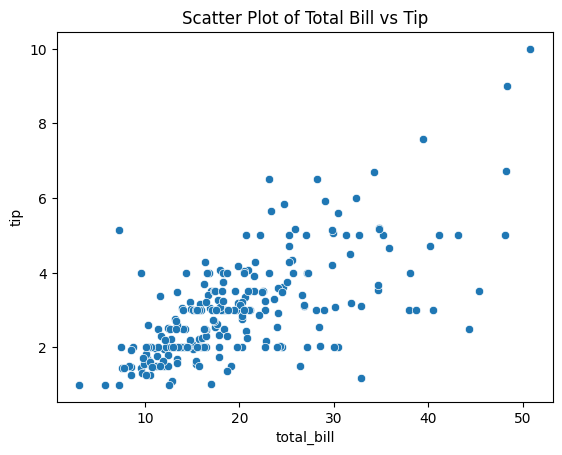

In [7]:
sns.scatterplot(x='total_bill',y='tip',data=tips_ds)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

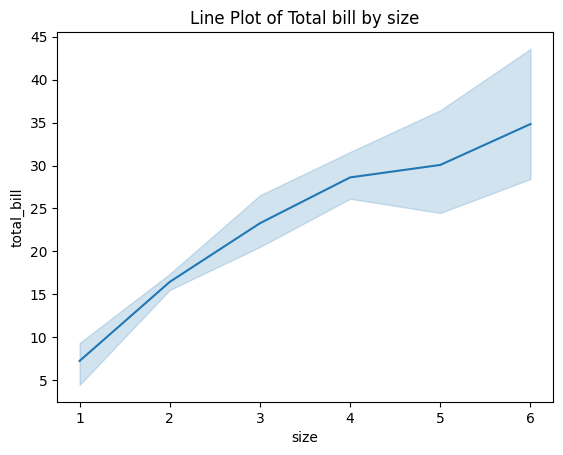

In [10]:
sns.lineplot(x='size',y='total_bill',data=tips_ds)
plt.title("Line Plot of Total bill by size")
plt.show()

## Categorical Plots
## BAr Plot

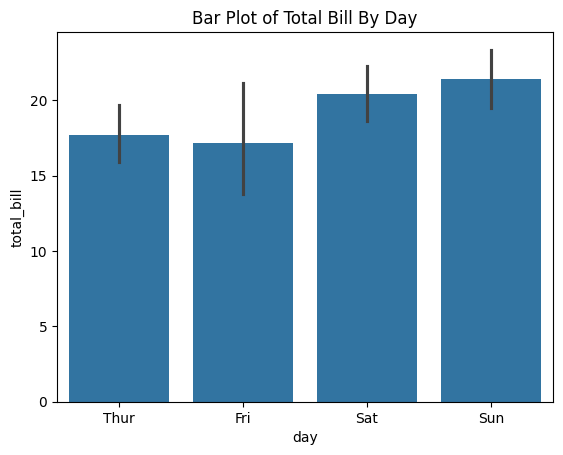

In [12]:
sns.barplot(x='day',y='total_bill',data=tips_ds)
plt.title('Bar Plot of Total Bill By Day')
plt.show()

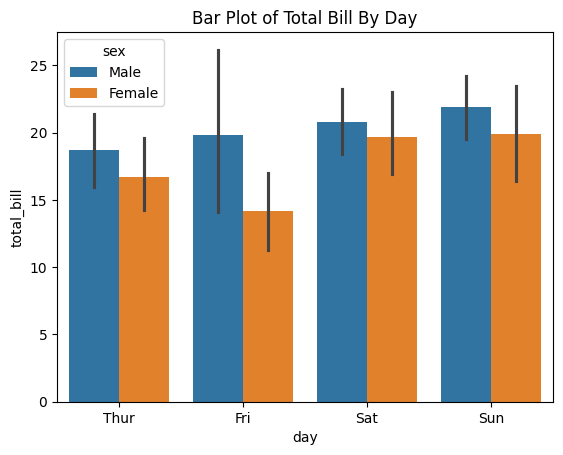

In [ ]:
sns.barplot(x='day',y='total_bill',hue='sex',data=tips_ds)
plt.title('Bar Plot of gender Bill By Day')
plt.show()

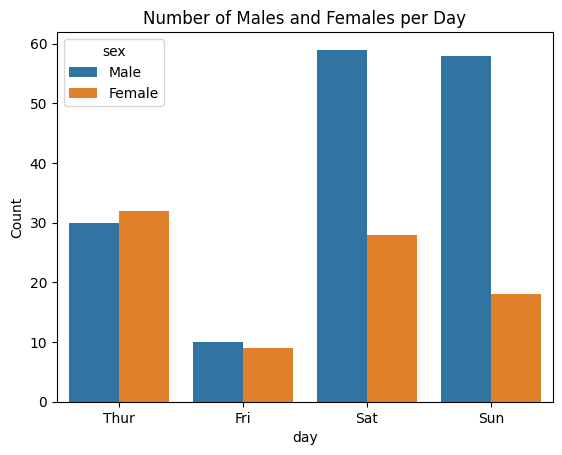

In [14]:
sns.countplot(x='day',hue='sex',data=tips_ds)
plt.title('Number of Males and Females per Day')
plt.ylabel('Count')
plt.show()

In [15]:
counts = tips_ds.groupby(['day', 'sex']).size().unstack(fill_value=0)
counts

C:\Users\Tanvir\AppData\Local\Temp\ipykernel_11344\258047692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = tips_ds.groupby(['day', 'sex']).size().unstack(fill_value=0)


sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


C:\Users\Tanvir\AppData\Local\Temp\ipykernel_11344\158044092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = tips_ds.groupby(['day', 'sex']).size().unstack(fill_value=0)
C:\Users\Tanvir\AppData\Local\Temp\ipykernel_11344\158044092.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


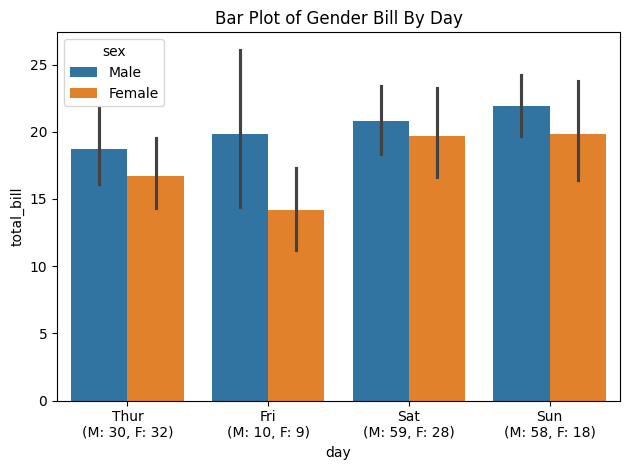

In [27]:





# Count number of males and females per day
counts = tips_ds.groupby(['day', 'sex']).size().unstack(fill_value=0)

# Create new x-axis labels with counts
new_labels = [
    f"{day}\n(M: {counts.loc[day].get('Male', 0)}, F: {counts.loc[day].get('Female', 0)})"
    for day in counts.index
]

# Map new labels to the correct order used in the plot
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
counts = counts.reindex(day_order)
new_labels = [
    f"{day}\n(M: {counts.loc[day].get('Male', 0)}, F: {counts.loc[day].get('Female', 0)})"
    for day in day_order
]

# Plot with new x-tick labels
ax = sns.barplot(x='day', y='total_bill', hue='sex', data=tips_ds, order=day_order)
plt.title('Bar Plot of Gender Bill By Day')

# Set new x-tick labels
ax.set_xticklabels(new_labels)

plt.tight_layout()
plt.show()


Boxplot

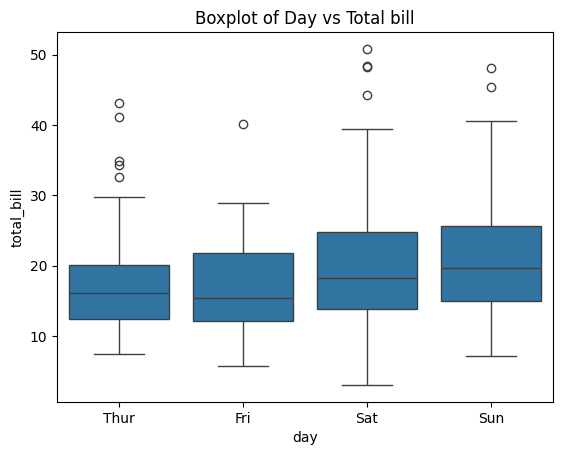

In [28]:
sns.boxplot(x="day",y='total_bill',data=tips_ds)
plt.title('Boxplot of Day vs Total bill')
plt.show()

violinplot

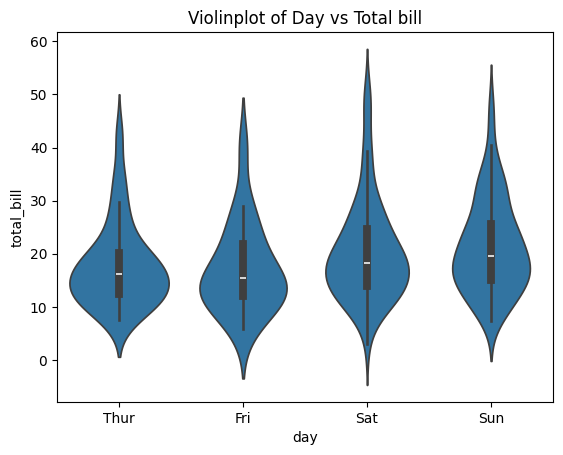

In [29]:
sns.violinplot(x='day',y='total_bill',data=tips_ds)
plt.title('Violinplot of Day vs Total bill')
plt.show()


Histoplot

<Axes: xlabel='total_bill', ylabel='Count'>

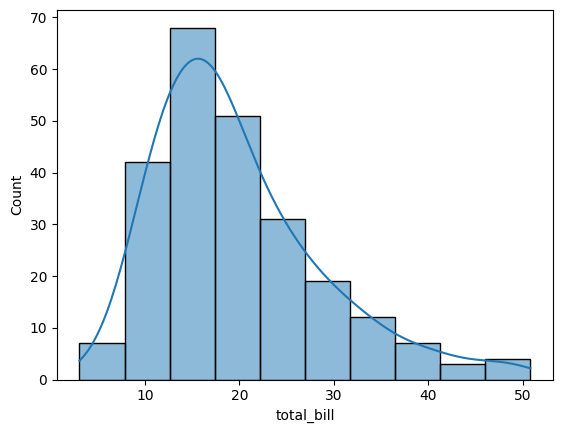

In [30]:
sns.histplot(tips_ds['total_bill'],bins=10,kde=True)

<Axes: xlabel='total_bill', ylabel='Density'>

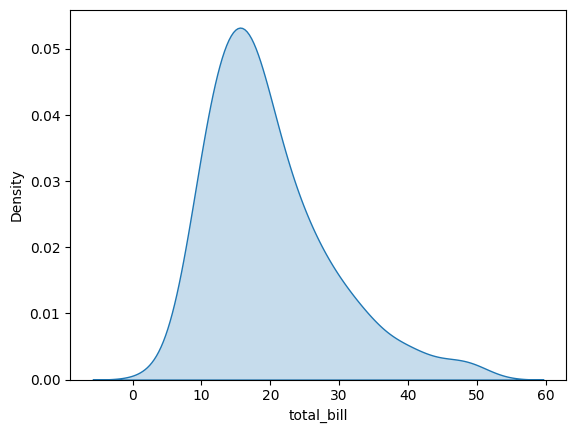

In [31]:
sns.kdeplot(tips_ds['total_bill'],fill=True)

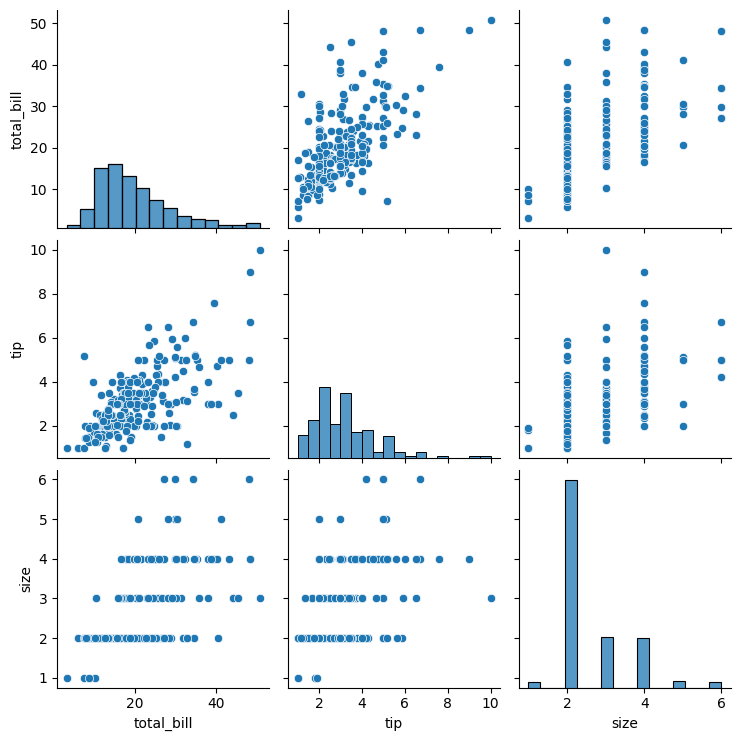

In [32]:
sns.pairplot(tips_ds)

correlation between features

In [34]:
corr=tips_ds[['total_bill','tip','size']].corr()
corr.round(2)

,total_bill,tip,size
total_bill,1.00,0.68,0.60
tip,0.68,1.00,0.49
size,0.60,0.49,1.00


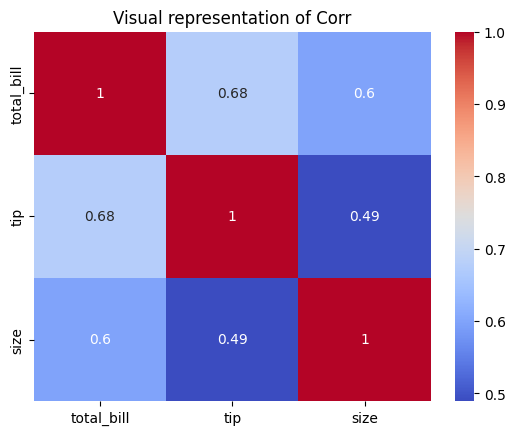

In [37]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Visual representation of Corr')
plt.show()

Another ds analysis

In [38]:
df=pd.read_csv('sales_data.csv')
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


In [39]:
df['Product Category'].value_counts()

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

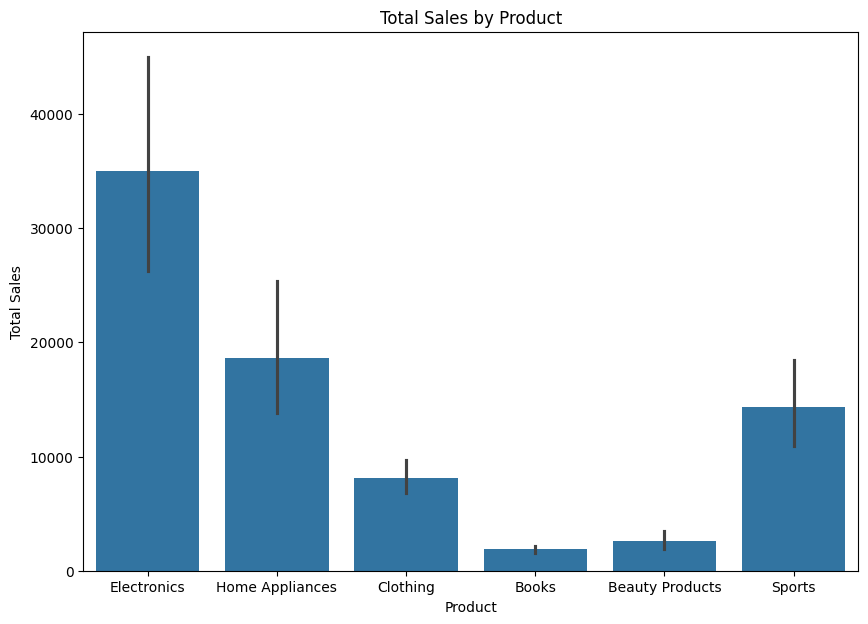

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(x='Product Category',y='Total Revenue',data=df,estimator=sum)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

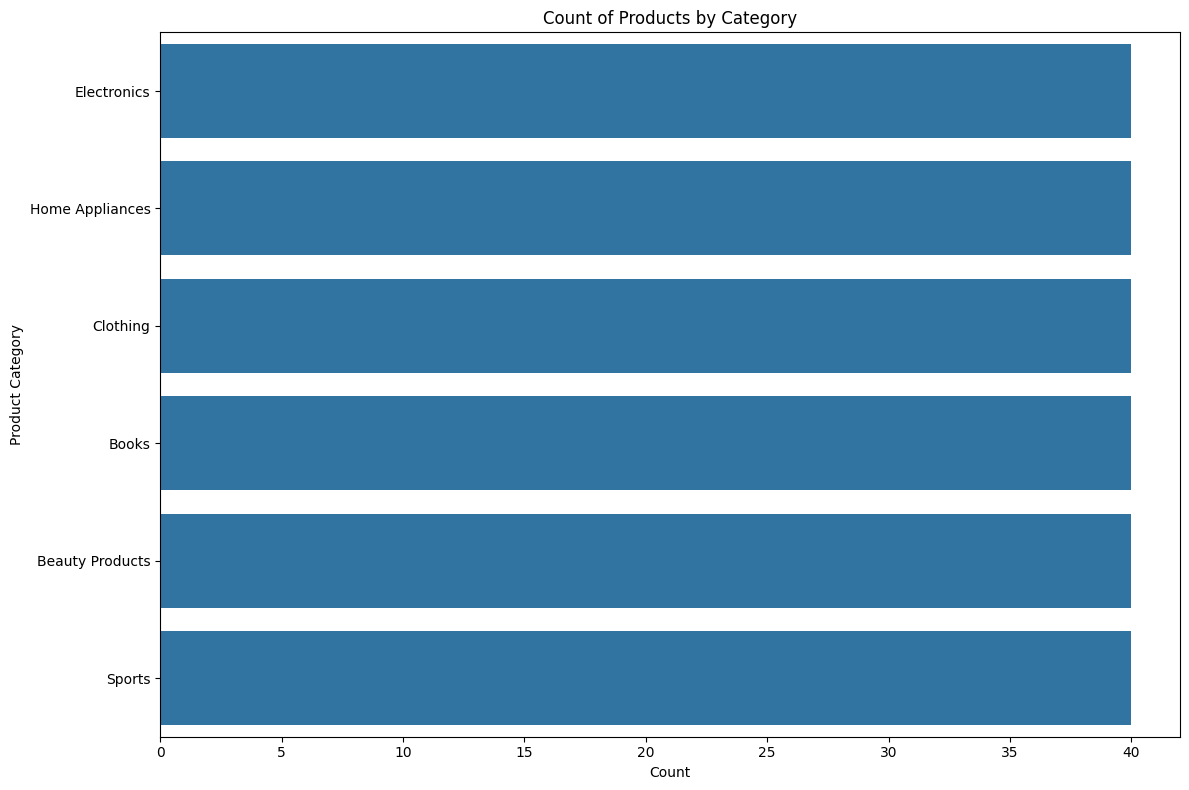

In [46]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Count of Products by Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

<Axes: xlabel='Region', ylabel='Total Revenue'>

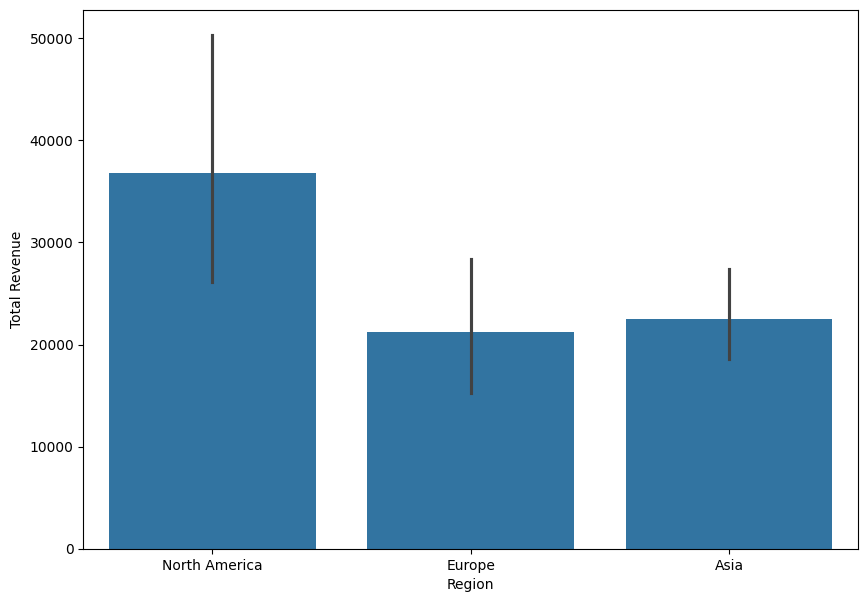

In [48]:
plt.figure(figsize=(10,7))
sns.barplot(x='Region',y='Total Revenue',data=df,estimator=sum)


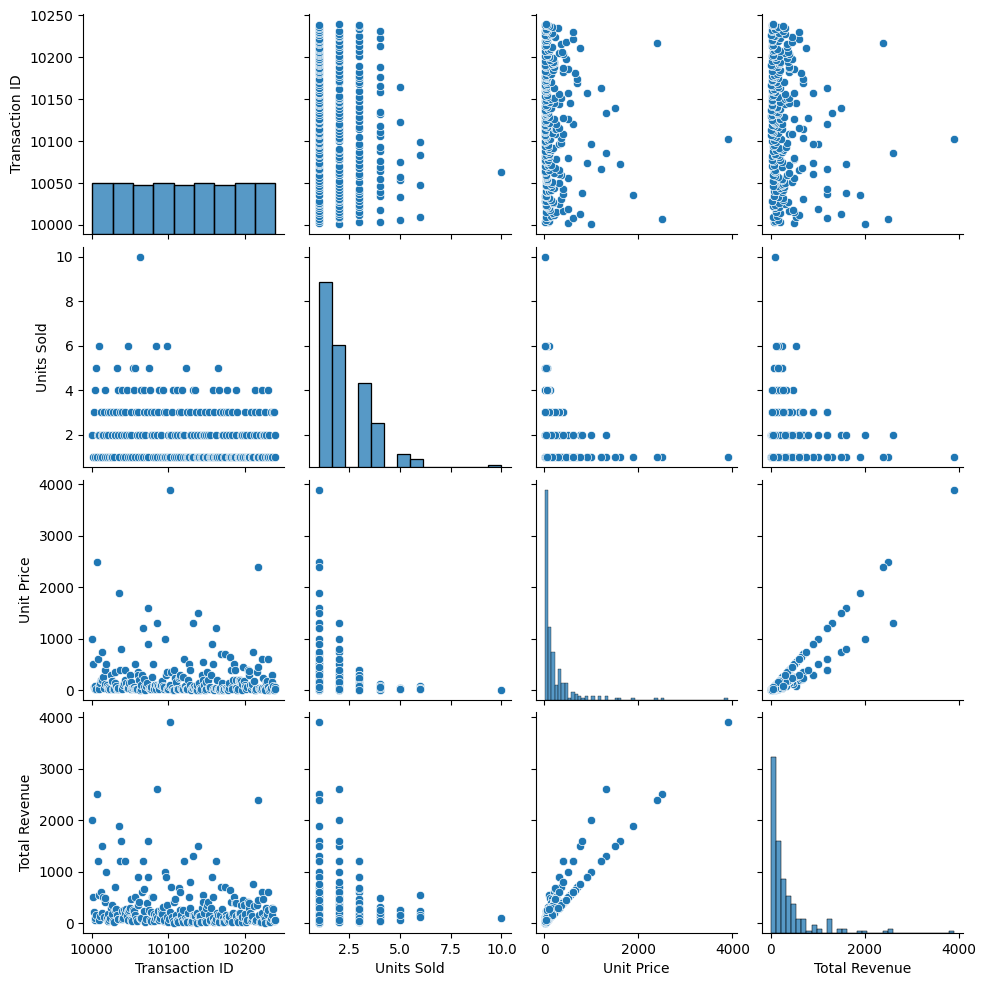

In [49]:
sns.pairplot(df)